#SVD - Netflix movie ratings

Adapted from: https://colab.research.google.com/github/ashishdasari148/Recommender-Systems-using-Collaborative-Filtering/blob/master/Netflix.ipynb#scrollTo=qX7Nk4tUGZND

In [7]:
!mkdir -p /root/.kaggle
!echo '{"username":"alanlinhui","key":"61f0b76ff5c9b70e5e6616f5bfc0e19b"}' > /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json
!pip install kaggle
!kaggle datasets download -d netflix-inc/netflix-prize-data

Dataset URL: https://www.kaggle.com/datasets/netflix-inc/netflix-prize-data
License(s): other


In [8]:
import os
import zipfile
with zipfile.ZipFile('netflix-prize-data.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

In [9]:
import pandas as pd

import re
import os
import time
import matplotlib.pyplot as plt
import numpy as np
dir_name = 'data'

In [10]:
# Converting the txt files into csv files
files = ['combined_data_1.txt','combined_data_2.txt','combined_data_3.txt','combined_data_4.txt']
for j in files:
    file1 = open(os.path.join(dir_name, j),"r+")
    print(j + " opened...")
    file2 = open(os.path.join(dir_name, j + '.csv'),"a")
    for i in file1.readlines():
        temp = re.match("(\d*)[:]", i)
        if(temp):
            movienumber = temp.group(1)
        else:
            file2.write(str(movienumber)+","+i)
    file1.close()
    file2.close()
    print(j + " closed...")

combined_data_1.txt opened...
combined_data_1.txt closed...
combined_data_2.txt opened...
combined_data_2.txt closed...
combined_data_3.txt opened...
combined_data_3.txt closed...
combined_data_4.txt opened...
combined_data_4.txt closed...


In [11]:
movie_titles = pd.read_csv(os.path.join(dir_name, 'movie_titles.csv'), encoding = 'ISO-8859-1', header = None, names=['Movie', 'Year of Release', 'Title'], usecols=[0, 1, 2])
movie_titles

,Movie,Year of Release,Title
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [12]:
## appending all the csv files of rating data into a single dataframe
dfs = []
for i in ['combined_data_1.txt.csv','combined_data_2.txt.csv','combined_data_3.txt.csv','combined_data_4.txt.csv']:
    df_ = pd.read_csv(os.path.join(dir_name, i), header=None, names=['Movie', 'User', 'Rating', 'Date'], usecols=[0, 1, 2, 3])
    df_ = df_[['Movie','User','Rating']]
    dfs.append(df_)
df_all = pd.concat(dfs, ignore_index=True)

In [13]:
print("number of ratings:", len(df_all))

number of ratings: 100480507


In [37]:
# search for your favorite movie

indices = movie_titles.Title.str.contains('The Empire Strikes Back', flags=re.IGNORECASE)
movie_titles[indices]
#--- Have-seen set
# 11678   Gladiator
# 2782    Braveheart
# 15124   Independence Day
# 10886   Waterworld
# 468     The Matrix: Revolutions
# 5582    Star Wars: Episode V: The Empire Strikes Back

#--- Random set:
# 9666    The Silence
# 11045   Doctor Who: The Caves of Androzani
# 16107   MASH: Season 3
# 10513   La Repetition
# 12026   ER: Season 3
# 6907    42 Up


,Movie,Year of Release,Title
5581,5582,1980.0,Star Wars: Episode V: The Empire Strikes Back


In [38]:
# Generate the random movie list. Modified by Hui Lin 03/26/2025

import random
# choosing random movies (fixed number as the have-seen set)
#movie_ids1 = set(df_all.sample(frac=.00001).Movie.unique())
unique_movie_ids = df_all['Movie'].unique()
if len(unique_movie_ids) >= 6:
    movie_ids1 = set(random.sample(list(unique_movie_ids), 6))
else:
    movie_ids1 = set(unique_movie_ids)
movie_ids1 = {int(x) for x in movie_ids1}

# or choosing your favorite
movie_ids2 = set({11678, 2782, 15124, 10886, 468, 5582})

movie_ids = movie_ids1|movie_ids2

# take a look
print("random set:",movie_ids1)
print(movie_ids)

random set: {9666, 11045, 16107, 10513, 12026, 6907}
{9666, 11045, 10886, 16107, 2782, 5582, 10513, 15124, 468, 12026, 6907, 11678}


In [46]:
df_all[df_all.Movie == 6907 ]

,Movie,User,Rating
38859831,6907,2070594,1
38859832,6907,2343417,4
38859833,6907,1551947,5
38859834,6907,2455019,3
38859835,6907,1381395,4
...,...,...,...
38859954,6907,1073184,3
38859955,6907,2356692,4
38859956,6907,396585,4
38859957,6907,1317657,3


In [47]:
# saving the merged file to drive for further use.
df_all.to_csv(path_or_buf=os.path.join(dir_name, 'data.txt.csv'),index=False)

In [ ]:
# loading the saved csv into dataframe
#df_all = pd.read_csv(os.path.join(dir_name, 'data.txt.csv'))

In [48]:
print("number of ratings:", len(df_all))

number of ratings: 100480507


In [49]:
df_movie_ids = df_all[df_all.Movie.isin(movie_ids)]
print("Unique movie ids in the dataframe:", (df_movie_ids.Movie.unique()))
print("Number of unique user ids:", len(df_movie_ids.User.unique()))

Unique movie ids in the dataframe: [  468  2782  5582  6907  9666 10513 10886 11045 11678 12026 15124 16107]
Number of unique user ids: 274496


In [50]:
# saving the selected data set to drive for further use.
df_movie_ids.to_csv(path_or_buf=os.path.join(dir_name, 'selected.csv'),index=False)

In [67]:
df_ = df_movie_ids.sample(frac=0.001)
len(df_)
#df_.head()

547

In [96]:
# create a dataframe that only contains rating for a subset of users and
# a subset of movies
user_ids = set(df_.User.unique())
#df_small = df_all[(df_all.User.isin(user_ids) & df_all.Movie.isin(movie_ids))]
df_small = df_all[df_all.Movie.isin(movie_ids)].copy()
df_small = df_small[df_small.User.isin(user_ids)]
print("Unique movie ids in the dataframe:", (df_small.Movie.unique()))
print("Number of unique user ids:", len(df_small.User.unique()))
print("Number of ratings:", len(df_small))

Unique movie ids in the dataframe: [  468  2782  5582 10886 11045 11678 12026 15124 16107]
Number of unique user ids: 547
Number of ratings: 1545


In [102]:
itom = list(sorted(movie_ids))
mtoi = {m: i for i, m in enumerate(itom)}
itou = list(sorted(user_ids))
utoi = {u: i for i, u in enumerate(itou)}

#--- take a look.   Add by Hui Lin 03/17/2025
print("---the info of random set:")
print("itom:",itom)
print("mtoi:",mtoi)
print("itou:",itou)
print("utoi:",utoi)

---the info of random set:
itom: [468, 2782, 5582, 6907, 9666, 10513, 10886, 11045, 11678, 12026, 15124, 16107]
mtoi: {468: 0, 2782: 1, 5582: 2, 6907: 3, 9666: 4, 10513: 5, 10886: 6, 11045: 7, 11678: 8, 12026: 9, 15124: 10, 16107: 11}
itou: [np.int64(12812), np.int64(17949), np.int64(27434), np.int64(27708), np.int64(31492), np.int64(38468), np.int64(38788), np.int64(41371), np.int64(43939), np.int64(44863), np.int64(49353), np.int64(52029), np.int64(52681), np.int64(53916), np.int64(58995), np.int64(59928), np.int64(60539), np.int64(67349), np.int64(71541), np.int64(73362), np.int64(74188), np.int64(76017), np.int64(79482), np.int64(79799), np.int64(83195), np.int64(88494), np.int64(96714), np.int64(99160), np.int64(102225), np.int64(124242), np.int64(145261), np.int64(146729), np.int64(147087), np.int64(147512), np.int64(167949), np.int64(177067), np.int64(181115), np.int64(182315), np.int64(188298), np.int64(188827), np.int64(194566), np.int64(196451), np.int64(196977), np.int64(203

In [103]:
user_movie_rating = np.zeros((len(itou), len(itom)))

for index, row in df_small.iterrows():
  movie_id = row.Movie
  movie_index = mtoi[movie_id]

  user_id = row.User
  user_index = utoi[user_id]

  user_movie_rating[user_index, movie_index] = row.Rating

In [104]:
user_movie_rating.shape

(547, 12)

In [105]:
#--- take a look
user_movie_rating[:10,]
print("the slice of data set's user_movie_rating\n", user_movie_rating[:10,])

#--- replace the "nan" with 0 in the um matrix.  Add by Hui Lin 03/26/2025
um = df_small.pivot_table(index='User', columns='Movie', values='Rating').fillna(0).values
print("the slice of um\n", um[:10,])

the slice of data set's user_movie_rating
 [[4.00 3.00 4.00 0.00 0.00 0.00 3.00 0.00 0.00 5.00 4.00 3.00]
 [4.00 4.00 5.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 5.00 0.00]
 [2.00 4.00 5.00 0.00 0.00 0.00 2.00 0.00 2.00 0.00 4.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.00 4.00 0.00 0.00 0.00 4.00 0.00]
 [0.00 5.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 4.00 0.00]
 [0.00 5.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 3.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 3.00 0.00]
 [0.00 4.00 4.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 2.00 0.00]
 [0.00 5.00 5.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 4.00 0.00]
 [0.00 4.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]]
the slice of um
 [[4.00 3.00 4.00 3.00 0.00 0.00 5.00 4.00 3.00]
 [4.00 4.00 5.00 0.00 0.00 0.00 0.00 5.00 0.00]
 [2.00 4.00 5.00 2.00 0.00 2.00 0.00 4.00 0.00]
 [0.00 0.00 0.00 4.00 0.00 0.00 0.00 4.00 0.00]
 [0.00 5.00 0.00 0.00 0.00 0.00 0.00 4.00 0.00]
 [0.00 5.00 0.00 0.00 0.00 0.00 0.00 3.00 0.00]
 [0.00 0.00 0.00 0.00

In [106]:
user_movie_rating[:10,]

array([[4.00, 3.00, 4.00, 0.00, 0.00, 0.00, 3.00, 0.00, 0.00, 5.00, 4.00,
        3.00],
       [4.00, 4.00, 5.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 5.00,
        0.00],
       [2.00, 4.00, 5.00, 0.00, 0.00, 0.00, 2.00, 0.00, 2.00, 0.00, 4.00,
        0.00],
       [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 4.00, 0.00, 0.00, 0.00, 4.00,
        0.00],
       [0.00, 5.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 4.00,
        0.00],
       [0.00, 5.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 3.00,
        0.00],
       [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 3.00,
        0.00],
       [0.00, 4.00, 4.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 2.00,
        0.00],
       [0.00, 5.00, 5.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 4.00,
        0.00],
       [0.00, 4.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
        0.00]])

In [107]:
# compute the SVD of the matrix
A = user_movie_rating
U, S, Vt = np.linalg.svd(A, full_matrices=False)

In [108]:
print(U.shape, S.shape, Vt.shape)

(547, 12) (12,) (12, 12)


In [109]:
A_hat = U @ np.diag(S) @ Vt

In [110]:
np.set_printoptions(suppress=True, formatter={'float': '{:0.2f}'.format})
print(A_hat[:10,])

[[4.00 3.00 4.00 0.00 0.00 0.00 3.00 -0.00 0.00 5.00 4.00 3.00]
 [4.00 4.00 5.00 -0.00 0.00 -0.00 -0.00 0.00 -0.00 0.00 5.00 -0.00]
 [2.00 4.00 5.00 -0.00 -0.00 -0.00 2.00 0.00 2.00 0.00 4.00 0.00]
 [0.00 -0.00 0.00 -0.00 -0.00 0.00 4.00 -0.00 -0.00 0.00 4.00 0.00]
 [0.00 5.00 0.00 0.00 -0.00 0.00 -0.00 0.00 -0.00 -0.00 4.00 0.00]
 [0.00 5.00 0.00 -0.00 -0.00 0.00 -0.00 -0.00 0.00 0.00 3.00 0.00]
 [0.00 -0.00 0.00 -0.00 0.00 0.00 -0.00 0.00 -0.00 -0.00 3.00 -0.00]
 [0.00 4.00 4.00 0.00 -0.00 -0.00 -0.00 -0.00 -0.00 0.00 2.00 -0.00]
 [0.00 5.00 5.00 0.00 -0.00 -0.00 -0.00 -0.00 -0.00 0.00 4.00 -0.00]
 [0.00 4.00 0.00 0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00 0.00 -0.00]]


In [111]:
sum([a*a for a in S[:3]])/sum([a*a for a in S])

np.float64(0.8666118771370831)

In [209]:
r = 8
A_hat_r = U[:,:r] @ np.diag(S[:r]) @ Vt[:r,:]
np.set_printoptions(suppress=True, formatter={'float': '{:0.2f}'.format})
print(A_hat_r[:10,])

[[4.00 3.00 4.00 0.00 0.00 0.00 3.00 0.18 -0.00 5.00 4.00 3.00]
 [4.00 4.00 5.00 -0.00 0.00 -0.00 -0.00 0.02 -0.00 -0.00 5.00 -0.00]
 [2.00 4.00 5.00 -0.00 -0.00 -0.00 2.00 0.04 2.00 -0.00 4.00 -0.00]
 [-0.00 0.00 0.00 -0.00 -0.00 0.00 4.00 -0.02 0.00 0.00 4.00 0.00]
 [0.00 5.00 -0.00 -0.00 0.00 0.00 -0.00 0.03 -0.00 -0.00 4.00 -0.00]
 [0.00 5.00 -0.00 0.00 0.00 0.00 -0.00 0.03 -0.00 -0.00 3.00 -0.00]
 [-0.00 0.00 0.00 -0.00 0.00 0.00 0.00 -0.02 0.00 0.00 3.00 0.00]
 [0.00 4.00 4.00 0.00 -0.00 -0.00 -0.00 0.03 -0.00 -0.00 2.00 -0.00]
 [0.00 5.00 5.00 0.00 -0.00 -0.00 -0.00 0.03 -0.00 -0.00 4.00 -0.00]
 [0.00 4.00 -0.00 0.00 -0.00 -0.00 -0.00 0.04 -0.00 -0.00 0.00 -0.00]]


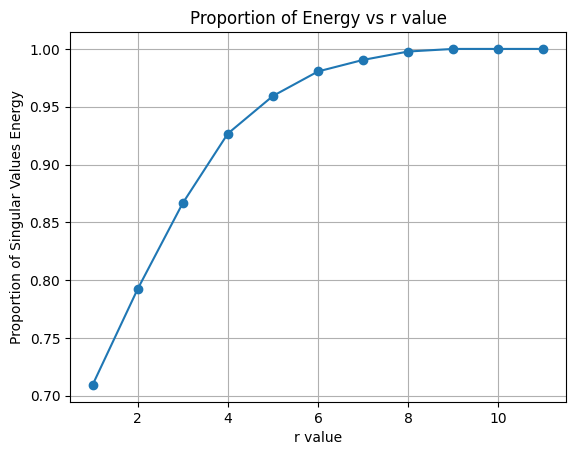

In [155]:
#--- Analytical studies of energy value  add by Hui Lin 03/17/2025
import matplotlib.pyplot as plt

# energy list
energyRate = []
# the range of r
r = range(1, 12)

for i in r:
    numerator = sum([a * a for a in S[:i]])
    denominator = sum([a * a for a in S])
    rate = numerator / denominator
    energyRate.append(rate)

# draw the trendy
plt.plot(r, energyRate, marker='o')
plt.xlabel('r value')
plt.ylabel('Proportion of Singular Values Energy')
plt.title('Proportion of Energy vs r value')
plt.grid(True)
plt.show()

### 4.Compose a query vector

In [210]:
import numpy as np
import pandas as pd

#--- Compose a query vector representing my movie preferences
# Let's create a query vector with ratings for movies we've seen and 0 for others
query_vector = np.zeros(len(itom))

#--- Assign ratings to movies (scale 1-5)
seen_movie_ratings = {
    11678: 5,   # Gladiator
    2782: 3,    # Braveheart
    15124: 4,   # Independence Day
    10886: 5,   # Waterworld
    468: 5,     # The Matrix: Revolutions
    5582: 3,    # Star Wars: Episode V: The Empire Strikes Back
    9666: 4,    # The Silence (1963)
    11045: 0,   # Doctor Who: The Caves of Androzani(1984)
    16107: 0,   # MASH: Season 3 （1974）
    10513: 4,   # La Repetition (2001)
    12026: 5,   # ER: Season 3 (1996)
    6907: 5     # 42 Up (1998)
}

for movie_id, rating in seen_movie_ratings.items():
    if movie_id in mtoi:
        query_vector[mtoi[movie_id]] = rating

#--- take a look
print("Query vector:")
for i, rating in enumerate(query_vector):
        print(f"Movie {itom[i]}: {rating}")


Query vector:
Movie 468: 5.0
Movie 2782: 3.0
Movie 5582: 3.0
Movie 6907: 5.0
Movie 9666: 4.0
Movie 10513: 4.0
Movie 10886: 5.0
Movie 11045: 0.0
Movie 11678: 5.0
Movie 12026: 5.0
Movie 15124: 4.0
Movie 16107: 0.0


### 5.Project the query vector into concept space

In [211]:
#---use the first r concepts (as in the SVD approximation)
query_concept = query_vector @ Vt[:r,:].T @ np.diag(1/S[:r])

#--- take a look
print("r:",r)
print(query_concept.shape)

r: 8
(8,)


### 6.Project all the users into concept space

In [212]:
#--- Project all users into concept space
users_concept = U[:,:r] @ np.diag(S[:r])

#--- take a look
print(users_concept.shape)

(547, 8)


### 7.Project all the movies into concept space

In [213]:

#--- Project all movies into concept space
movies_concept = np.diag(S[:r]) @ Vt[:r,:]

#--- take a look
print(movies_concept.shape)


(8, 12)


### 8.Produce the top 5 users that have similar tastes as mine

In [214]:

#--- Calculate cosine similarity between query and all users
user_similarities = np.zeros(len(itou))
for i in range(len(itou)):
    user_similarities[i] = np.dot(query_concept, users_concept[i,:]) / (
        np.linalg.norm(query_concept) * np.linalg.norm(users_concept[i,:]))

#--- Get top 5 similar users
top_user_indices = np.argsort(user_similarities)[-5:][::-1]
top_user_ids = [itou[i] for i in top_user_indices]
top_user_sims = user_similarities[top_user_indices]

print("\nTop 5 users with similar tastes:")
for user_id, sim in zip(top_user_ids, top_user_sims):
    print(f"User {user_id}: similarity = {sim:.3f}")




Top 5 users with similar tastes:
User 759492: similarity = 0.616
User 2433649: similarity = 0.589
User 181115: similarity = 0.542
User 977681: similarity = 0.524
User 257923: similarity = 0.505


### 9.Produce the top 5 movies that might attract me

In [215]:
#--- Use ratings from top 5 similar users to recommend movies in all list

#--- Get ratings from top 5 similar users
top_users_ratings = df_all[df_all['User'].isin(top_user_ids)]

#--- Calculate average rating for each movie by these users
movie_recommendations = top_users_ratings.groupby('Movie')['Rating'].mean().reset_index()

#--- Filter out movies I've already seen
movies_not_seen = movie_recommendations[~movie_recommendations['Movie'].isin(seen_movie_ratings.keys())]

#--- Get top 5 highest rated movies by similar users
top_5_movies = movies_not_seen.sort_values('Rating', ascending=False).head(5)

#--- Merge with movie titles to get movie names
top_5_movies_with_titles = pd.merge(top_5_movies, movie_titles, on='Movie')

#--- output results of recommendation
print("\nTop 5 recommended movies from ALL movies (based on top similar users):")
for _, row in top_5_movies_with_titles.iterrows():
    print(f"Movie {row['Movie']} ({row['Title']}): [avg rating] = {row['Rating']:.2f}")




Top 5 recommended movies from ALL movies (based on top similar users):
Movie 1877 (Friends: Season 2): [avg rating] = 5.00
Movie 3686 (Good Advice): [avg rating] = 5.00
Movie 1664 (The King of Queens: Season 2): [avg rating] = 5.00
Movie 9644 (Stargate SG-1: Season 6): [avg rating] = 5.00
Movie 6240 (Awakenings): [avg rating] = 5.00


### Report on Assignment 06 SVD-based Recommender System Experiment  

In this assignment, I implemented a collaborative filtering recommender system using SVD on the Netflix movie rating dataset. The experiment focused on analyzing how two key parameters **r-value (number of retained singular values)** and **query vector design** affect recommendation outcomes.  

***Key Findings:  ***
1.   Impact of r-value:
*   Low r (r=3): Produced high user similarity scores and mainstream movie recommendations (e.g., *The Empire Strikes Back*), demonstrating strong generalization but limited personalization.
*   High r (r=8): Reduced user similarity significantly and introduced niche recommendations (e.g., *La Repetition*), revealing finer-grained patterns at the cost of increased noise.


2.   Query Vector Sensitivity:
*   At low r, modifying the query vector (simulating ratings from https://movie.douban.com/ ) slightly increased similarity scores but left recommendations unchanged, indicating system stability.
*   At high r, the same changes caused dramatic shifts in both similarity scores and recommendations, highlighting heightened sensitivity to input variations.

**Experimental conclusion:**

The results validate that r-value controls the trade-off between generalization and overfitting in SVD. Low-r models prioritize broad patterns (high stability), while high-r models capture nuanced preferences (high sensitivity). Notably, query vector efficacy depends on this balance—user input matters most when the model complexity (r) aligns with data diversity.

This aligns perfectly with our lectures - r-value balances memorization vs. generalization, while query vector effectiveness depends on model complexity (r).
